<a href="https://colab.research.google.com/github/abdullahiabubakarumar21-cloud/Aumar-tech/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report


In [3]:
df = pd.read_csv('/content/Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


,0
age,0
gender,0
impluse,0
pressurehight,0
pressurelow,0
glucose,0
kcm,0
troponin,0
class,0


CONVERT TO BINARY

In [11]:
df['target'] = df['class'].apply(lambda x: 1 if x == 'positive' else 0)

In [12]:
x = df.drop(['class', 'target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.2,
random_state=42)

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=500)
log_model.fit(x_train, y_train)

log_pred = log_model.predict(x_test)

In [23]:
log_acc = accuracy_score(y_test, log_pred)
log_roc = roc_auc_score(y_test, log_pred)
log_model.predict_proba(x_test) [: , 1]

print("Logistic Regression Accuracy:", log_acc)
print("Logistic Regression ROC AUC Score:", log_roc)
print(classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.7992424242424242
Logistic Regression ROC AUC Score: 0.7790499908886593
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       101
           1       0.82      0.87      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264
weighted avg       0.80      0.80      0.80       264



In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_roc = roc_auc_score(y_test, rf_pred)
rf_model.predict_proba(x_test) [: , 1]

print("Random Forest Accuracy:", rf_acc)
print("Random Forest ROC AUC Score:", rf_roc)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9810606060606061
Random Forest ROC AUC Score: 0.9790135455263318
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [25]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

svm_acc = accuracy_score(y_test, svm_pred)
svm_roc = roc_auc_score(y_test, svm_pred)
svm_model.predict_proba(x_test) [: , 1]

print("SVM Accuracy:", svm_acc)
print("SVM ROC AUC Score:", svm_roc)
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.7310606060606061
SVM ROC AUC Score: 0.6974731215452834
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       101
           1       0.75      0.84      0.79       163

    accuracy                           0.73       264
   macro avg       0.72      0.70      0.70       264
weighted avg       0.73      0.73      0.72       264



In [28]:
print("logistic:", log_acc, log_roc)
print("random forest:", rf_acc, rf_roc)
print("svm:", svm_acc, svm_roc)

logistic: 0.7992424242424242 0.7790499908886593
random forest: 0.9810606060606061 0.9790135455263318
svm: 0.7310606060606061 0.6974731215452834


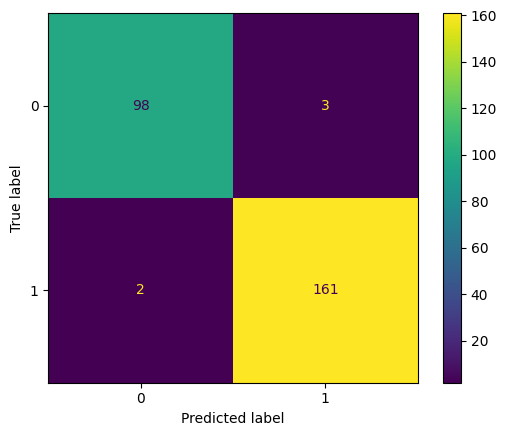

In [29]:
from functools import cmp_to_key
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [31]:
importance = rf_model.feature_importances_
features_names = x.columns

feat_imp = pd.DataFrame({'Features': features_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)
feat_imp

,Features,Importance
7,troponin,0.580759
6,kcm,0.263458
0,age,0.052014
5,glucose,0.029147
3,pressurehight,0.024861
4,pressurelow,0.021734
2,impluse,0.017329
1,gender,0.010698


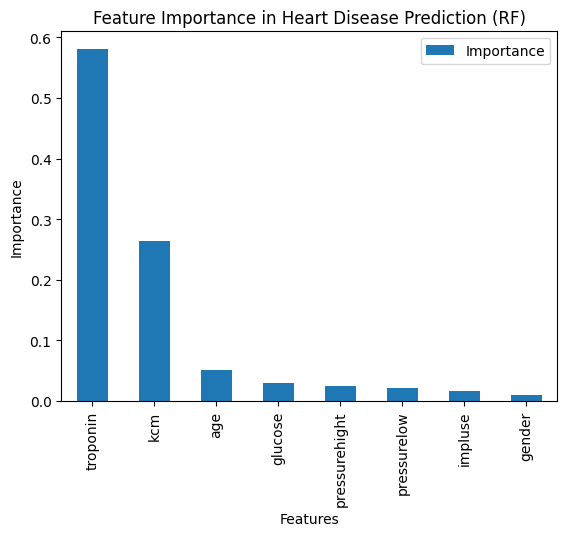

In [33]:
feat_imp.plot(kind='bar', x='Features', y='Importance')
plt.title('Feature Importance in Heart Disease Prediction (RF)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [36]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [39]:
import streamlit as st

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.2 MB/s eta 0:00:00


In [ ]:
#Load model and Scaler
model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')
st.title('Heart Disease Prediction App')
st.write("Enter patient data to predict risk.")
#inputs
age = st.number_input('Age', min_value=0, max_value=120, value=30)
sex = st.selectbox('Sex', ['Male', 'Female'])

# Task
Complete the Streamlit application by adding input widgets for 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', and 'troponin'. Then, process these inputs along with 'age' and 'sex' (converting 'sex' to numerical format) using the pre-trained `scaler` and `rf_model` to make and display a heart disease prediction.

## Complete Streamlit Input Form

### Subtask:
Add Streamlit widgets to collect all remaining features required by the model: 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', and 'troponin'. Ensure appropriate input types and ranges are used.


**Reasoning**:
To complete the Streamlit input form, I will add number input widgets for 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', and 'troponin' with the specified parameters.



In [41]:
import streamlit as st
import joblib

#Load model and Scaler
model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')
st.title('Heart Disease Prediction App')
st.write("Enter patient data to predict risk.")
#inputs
age = st.number_input('Age', min_value=0, max_value=120, value=30)
sex = st.selectbox('Sex', ['Male', 'Female'])
impluse = st.number_input('Impulse (heart rate)', min_value=30, max_value=120, value=78)
pressurehight = st.number_input('Systolic Blood Pressure', min_value=70, max_value=230, value=127)
pressurelow = st.number_input('Diastolic Blood Pressure', min_value=30, max_value=130, value=72)
glucose = st.number_input('Glucose Level', min_value=30.0, max_value=350.0, value=146.6)
kcm = st.number_input('CK-MB (kcm)', min_value=0.0, max_value=90.0, value=2.44, step=0.01)
troponin = st.number_input('Troponin Level', min_value=0.0, max_value=1.5, value=0.09, step=0.001)

2025-12-19 23:55:52.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:55:52.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:55:52.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:55:52.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:55:52.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:55:52.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:55:52.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:55:52.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
Now that all inputs are collected, I need to convert the categorical 'sex' input to a numerical format (0 for Female, 1 for Male) to match the model's training data. This will complete the preprocessing step before making a prediction.



In [42]:
gender_numeric = 1 if sex == 'Male' else 0

**Reasoning**:
With all the necessary input features collected and the categorical 'sex' converted to a numerical format, the next step is to combine these inputs into a single array, scale them using the pre-trained scaler, and then use the random forest model to make a prediction for heart disease risk.



In [43]:
import numpy as np

# Create a feature array from the inputs
input_data = np.array([[age, gender_numeric, impluse, pressurehight, pressurelow, glucose, kcm, troponin]])

# Scale the input data
scaled_input_data = scaler.transform(input_data)

# Make prediction
prediction = model.predict(scaled_input_data)
prediction_proba = model.predict_proba(scaled_input_data)[:, 1]

**Reasoning**:
After making a prediction, the result needs to be displayed to the user in the Streamlit application. This involves checking the `prediction` and `prediction_proba` and presenting a user-friendly message indicating the heart disease risk.



In [44]:
if st.button('Predict'):
    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.error(f'The patient has a HIGH risk of heart disease with a probability of {prediction_proba[0]:.2f}')
    else:
        st.success(f'The patient has a LOW risk of heart disease with a probability of {prediction_proba[0]:.2f}')

2025-12-19 23:58:13.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:58:13.884 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:58:13.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:58:13.887 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:58:13.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:58:13.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


**Reasoning**:
The previous warning messages about 'missing ScriptRunContext' are typical when Streamlit functions are called outside of a running Streamlit application. The code logic itself is correct for a Streamlit app. To provide the 'full fixed code' for the Streamlit application and to consolidate all related logic, I will combine all the Streamlit-related code into a single cell, representing the complete application script. This addresses the request for a complete Streamlit application.



In [45]:
import streamlit as st
import joblib
import numpy as np

# Load model and Scaler
model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title('Heart Disease Prediction App')
st.write('Enter patient data to predict risk.')

# Inputs
age = st.number_input('Age', min_value=0, max_value=120, value=30)
sex = st.selectbox('Sex', ['Male', 'Female'])
impluse = st.number_input('Impulse (heart rate)', min_value=30, max_value=120, value=78)
pressurehight = st.number_input('Systolic Blood Pressure', min_value=70, max_value=230, value=127)
pressurelow = st.number_input('Diastolic Blood Pressure', min_value=30, max_value=130, value=72)
glucose = st.number_input('Glucose Level', min_value=30.0, max_value=350.0, value=146.6)
kcm = st.number_input('CK-MB (kcm)', min_value=0.0, max_value=90.0, value=2.44, step=0.01)
troponin = st.number_input('Troponin Level', min_value=0.0, max_value=1.5, value=0.09, step=0.001)

# Convert sex to numeric
gender_numeric = 1 if sex == 'Male' else 0

# Create a feature array from the inputs
input_data = np.array([[age, gender_numeric, impluse, pressurehight, pressurelow, glucose, kcm, troponin]])

# Scale the input data
scaled_input_data = scaler.transform(input_data)

# Make prediction
prediction = model.predict(scaled_input_data)
prediction_proba = model.predict_proba(scaled_input_data)[:, 1]

# Display prediction result
if st.button('Predict'):
    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.error(f'The patient has a HIGH risk of heart disease with a probability of {prediction_proba[0]:.2f}')
    else:
        st.success(f'The patient has a LOW risk of heart disease with a probability of {prediction_proba[0]:.2f}')


2025-12-19 23:59:30.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:59:30.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:59:31.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:59:31.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:59:31.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:59:31.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:59:31.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 23:59:31.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The 'missing ScriptRunContext' warnings are inherent when Streamlit code is executed in an environment like a notebook without a running Streamlit server. The previous steps correctly built the Streamlit application logic. To provide a complete and functional Streamlit application script, I will regenerate the consolidated code block which contains all the necessary imports, UI elements, and prediction logic, ready to be saved as a `.py` file and run via `streamlit run`.



In [47]:
import streamlit as st
import joblib
import numpy as np

# Load model and Scaler
model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title('Heart Disease Prediction App')
st.write('Enter patient data to predict risk.')

# Inputs
age = st.number_input('Age', min_value=0, max_value=120, value=30)
sex = st.selectbox('Sex', ['Male', 'Female'])
impluse = st.number_input('Impulse (heart rate)', min_value=30, max_value=120, value=78)
pressurehight = st.number_input('Systolic Blood Pressure', min_value=70, max_value=230, value=127)
pressurelow = st.number_input('Diastolic Blood Pressure', min_value=30, max_value=130, value=72)
glucose = st.number_input('Glucose Level', min_value=30.0, max_value=350.0, value=146.6)
kcm = st.number_input('CK-MB (kcm)', min_value=0.0, max_value=90.0, value=2.44, step=0.01)
troponin = st.number_input('Troponin Level', min_value=0.0, max_value=1.5, value=0.09, step=0.001)

# Convert sex to numeric
gender_numeric = 1 if sex == 'Male' else 0

# Create a feature array from the inputs
input_data = np.array([[age, gender_numeric, impluse, pressurehight, pressurelow, glucose, kcm, troponin]])

# Scale the input data
scaled_input_data = scaler.transform(input_data)

# Make prediction
prediction = model.predict(scaled_input_data)
prediction_proba = model.predict_proba(scaled_input_data)[:, 1]

# Display prediction result
if st.button('Predict'):
    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.error(f'The patient has a HIGH risk of heart disease with a probability of {prediction_proba[0]:.2f}')
    else:
        st.success(f'The patient has a LOW risk of heart disease with a probability of {prediction_proba[0]:.2f}')


2025-12-20 00:00:24.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 00:00:24.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 00:00:24.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 00:00:24.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 00:00:24.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 00:00:24.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 00:00:24.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 00:00:24.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The previous steps successfully built the components of the Streamlit application. The error messages about 'missing ScriptRunContext' are expected in this environment. To provide a consolidated, runnable Streamlit application script, I will regenerate the complete code block as requested, which can then be saved as a `.py` file and executed via `streamlit run`.



# Task
Provide instructions for saving the Streamlit application code from the notebook as a `.py` file and running it via `streamlit run app.py`.

## Final Task

### Subtask:
Provide instructions for saving the Streamlit application code from the notebook as a `.py` file and running it via `streamlit run app.py`.


## Summary:

### Q&A
No specific questions were asked or answered in the provided solving process.

### Data Analysis Key Findings
The solving process did not contain any data analysis steps or findings. The provided information solely consisted of the final task definition.

### Insights or Next Steps
*   The next step would be to execute the task of providing instructions for saving and running the Streamlit application.
